訓練部分の利益増減を見る　エポック単位で

In [1]:
import pandas as pd
import matplotlib.pyplot as plt         
import os        
import re
import sys

In [2]:
#log_pathからpltに用いるdfを作成

def make_df_from_log_path(log_path):
    search_string = "Reached the end."
    output_lines = []

    with open(log_path, 'r') as file:
        lines = file.readlines()

        for i, line in enumerate(lines):
            if search_string in line:
                # temp_str = lines[i] + " " + lines[i+1] +  " " + lines[i+2] +  " " + lines[i-1] +  " " + lines[i-2] #i-nは[Evaluate]からn行上
                # output_lines.append(temp_str)
                if "train" in lines[i-1]:
                    # print(lines[i-1], lines[i])
                    temp_str = lines[i+1] + lines[i+2] +  lines[i+3] + lines[i+4] + lines[i+5] + lines[i+6]#i-nは[Evaluate]からn行上
                    output_lines.append(temp_str)

    data = output_lines
    # return output_lines

    # 各行をスペースで分割し、キーと値のペアに分ける
    parsed_data = [line.strip().split('\n') for line in data]
    # print(parsed_data[0])
    # sys.exit()

    # 各行のデータを辞書に格納し、DataFrameを作成する
    result = []
    for line in parsed_data:
        row_data = {}
        i=1
        for item in line:
            try:
                # if(i>1):
                key_value = item.split(':')
                data_value = key_value[1].split(',')
                # print(key_value[0])
                m =re.search(r"\d+\.\d+|\-\d+\.\d", data_value[0])
                # print(m.group(0), type(m.group(0)))
                # print(float(m.group(0)), type(float(m.group(0))))
                # break
                row_data[key_value[0]] = float(m.group(0))
                
                # if(i==1):
                #     print(item)
                #     key_value = item.split('_')
                #     # print(key_value[1])
                #     try:
                #         row_data[key_value[0]] = int(key_value[1][:7])
                #         # print(key_value[1])
                #     except:
                #         row_data[key_value[0]] = int(key_value[1][:-1])
                #         # print(row_data[key_value[0]])
                    
            except:
                # print(item)
                pass
                
            i+=1
        result.append(row_data)
        
    # print(result)

    # DataFrameを作成する
    df = pd.DataFrame(result)
    epoch = 272
    
    # print(df)
    return df



In [6]:
dfs = []
log_files = []

log_pathes = [
    # "/home/fukuda/nodhup_outputs_4/SEC_only_n1.log",
    # "/home/fukuda/nodhup_outputs_4/tweet_only_n2.log", 
    # "/home/fukuda/nodhup_outputs_4/withoneSEC_tf_n5_model4.log",
    "/home/fukuda/nohup_outputs_m2_212/with2SEC_tf_model4_2.log",
    "/home/fukuda/nohup_outputs_m2_212/with2SEC_tf_model4_8.log"
]

for log_path in log_pathes:
    log_files.append(os.path.basename(log_path))
    df = make_df_from_log_path(log_path)
    dfs.append(df)
    

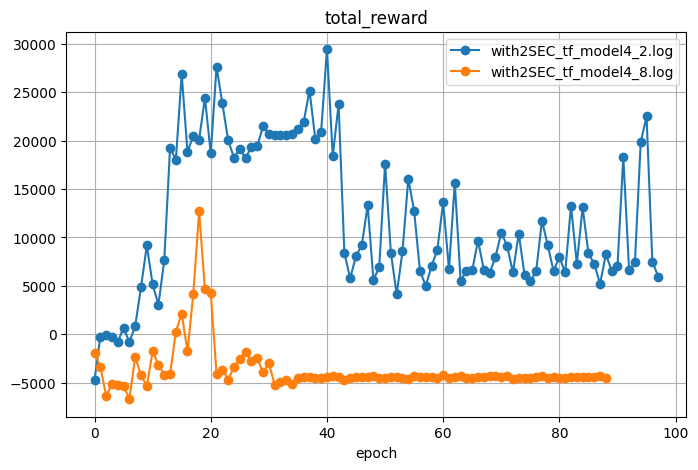

In [7]:
indicators = ["total_reward"]

for indicator in indicators:
# x軸にはdfの一列目のデータを、y軸には2列目以降のデータをプロットします
    plt.figure(figsize=(8, 5))  # グラフのサイズを設定します
    for df, log_file in zip(dfs, log_files):
        # df = df[(df['Step'] >= 0) & (df['Step'] <= 1000)] #期間調整
        for column in df[[indicator]]:  # ここで何をプロットするか設定  total_reward mean_sharpe　mean_mdd
            # plt.plot(df[df.columns[0]], (df[column]+100000)/100000, marker='o', label=log_file) #tortal reward
            plt.plot(df[column], marker='o', label=log_file)

    # df = df_2
    # df = df[:21]
    # for column in df.columns[1:2]:  # ここで何列目をプロットするか設定
    #     plt.plot(df[df.columns[0]], df[column], marker='o', label=column)

    plt.xlabel("epoch")  # x軸のラベルを設定します
    # plt.ylabel("Values")  # y軸のラベルを設定します
    title = column
    # title = "profit_ratio"
    plt.title(title)  # グラフのタイトルを設定します
    plt.legend()  # 凡例を追加します
    plt.grid(True)  # グリッドを表示します（オプション）

    # save_png_name = title + "_" + log_files[0] + "_" + log_files[1] + ".png"
    # save_folder = "/home/fukuda/profit-naacl/profit-naacl_2/pngs"
    # save_path = os.path.join(save_folder, save_png_name)
    # print(save_path)
    # plt.savefig(save_path)

    plt.show()  # グラフを表示します